# Analyzing, found errors based on **OWASP, OAS** traced by ***Spectral***

In [ ]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/API_GOV/error_openapi_my_ruleset_f.json')

In [ ]:
severity = {
    "error":0,
    "warning":1,
    "infos":2,
    "hints":3
}

In [ ]:
df.head()

,code,path,message,severity,range,source
0,oas3-api-servers,[],"OpenAPI ""servers"" must be present and non-empt...",1,"{'start': {'line': 0, 'character': 0}, 'end': ...",c:/OnePoint/openapi.yaml
1,operation-operationId,"[paths, /connect/token, post]","Operation must have ""operationId"".",1,"{'start': {'line': 17, 'character': 9}, 'end':...",c:/OnePoint/openapi.yaml
2,operation-tag-defined,"[paths, /connect/token, post, tags, 0]",Operation tags must be defined in global tags.,1,"{'start': {'line': 19, 'character': 10}, 'end'...",c:/OnePoint/openapi.yaml
3,owasp:api4:2023-string-limit,"[paths, /connect/token, post, requestBody, con...","Schema of type string must specify maxLength, ...",0,"{'start': {'line': 28, 'character': 27}, 'end'...",c:/OnePoint/openapi.yaml
4,owasp:api4:2023-string-restricted,"[paths, /connect/token, post, requestBody, con...","Schema of type string should specify a format,...",1,"{'start': {'line': 28, 'character': 27}, 'end'...",c:/OnePoint/openapi.yaml


In [ ]:
df.describe()

,severity
count,107.000000
mean,0.560748
std,0.498632
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df = df.drop('source', axis=1) # remove 'source'

In [ ]:
df['severity'] = df['severity'].map({0: 'error', 1: 'warning'})

In [ ]:
df.head()

,code,path,message,severity,range
0,oas3-api-servers,[],"OpenAPI ""servers"" must be present and non-empt...",warning,"{'start': {'line': 0, 'character': 0}, 'end': ..."
1,operation-operationId,"[paths, /connect/token, post]","Operation must have ""operationId"".",warning,"{'start': {'line': 17, 'character': 9}, 'end':..."
2,operation-tag-defined,"[paths, /connect/token, post, tags, 0]",Operation tags must be defined in global tags.,warning,"{'start': {'line': 19, 'character': 10}, 'end'..."
3,owasp:api4:2023-string-limit,"[paths, /connect/token, post, requestBody, con...","Schema of type string must specify maxLength, ...",error,"{'start': {'line': 28, 'character': 27}, 'end'..."
4,owasp:api4:2023-string-restricted,"[paths, /connect/token, post, requestBody, con...","Schema of type string should specify a format,...",warning,"{'start': {'line': 28, 'character': 27}, 'end'..."


## Error Codes (OWASP, OAS, ..) with count #https://owasp.org/Top10/

In [ ]:
df['code'].value_counts()  # https://owasp.org/Top10/

,count
code,
owasp:api4:2023-string-limit,17
owasp:api4:2023-integer-limit,16
owasp:api4:2023-string-restricted,14
owasp:api4:2023-rate-limit-responses-429,10
owasp:api8:2023-define-error-responses-401,10
owasp:api8:2023-define-error-responses-500,10
operation-operationId,5
operation-tag-defined,5
owasp:api8:2023-define-error-validation,5


## Severity Count (Error, Warning, Infos, Hints)

In [ ]:
severity_counts = df['severity'].value_counts()
print(severity_counts)

severity
warning    60
error      47
Name: count, dtype: int64


## Severity by code

In [ ]:
severity_by_code = df.groupby(['code', 'severity'])['severity'].count().unstack().fillna(0)
print(severity_by_code)

severity                                    error  warning
code                                                      
oas3-api-servers                              0.0      1.0
oas3-valid-schema-example                     2.0      0.0
operation-operationId                         0.0      5.0
operation-tag-defined                         0.0      5.0
owasp:api1:2023-no-numeric-ids                2.0      0.0
owasp:api4:2023-array-limit                   5.0      0.0
owasp:api4:2023-integer-limit                16.0      0.0
owasp:api4:2023-rate-limit                    5.0      0.0
owasp:api4:2023-rate-limit-responses-429      0.0     10.0
owasp:api4:2023-string-limit                 17.0      0.0
owasp:api4:2023-string-restricted             0.0     14.0
owasp:api8:2023-define-error-responses-401    0.0     10.0
owasp:api8:2023-define-error-responses-500    0.0     10.0
owasp:api8:2023-define-error-validation       0.0      5.0


In [ ]:
severity_by_code_error = severity_by_code[severity_by_code['error'] > 0][['error']]
print(severity_by_code_error)

severity                        error
code                                 
oas3-valid-schema-example         2.0
owasp:api1:2023-no-numeric-ids    2.0
owasp:api4:2023-array-limit       5.0
owasp:api4:2023-integer-limit    16.0
owasp:api4:2023-rate-limit        5.0
owasp:api4:2023-string-limit     17.0


In [ ]:
def classify_severity(code):
  if 'limit' in code:
    return 'critical'
  elif 'example' in code:
    return 'major'
  else:
    return 'minor'

severity_by_code_error['classification'] = severity_by_code_error.index.map(classify_severity)
print(severity_by_code_error)

severity                        error classification
code                                                
oas3-valid-schema-example         2.0          major
owasp:api1:2023-no-numeric-ids    2.0          minor
owasp:api4:2023-array-limit       5.0       critical
owasp:api4:2023-integer-limit    16.0       critical
owasp:api4:2023-rate-limit        5.0       critical
owasp:api4:2023-string-limit     17.0       critical


In [ ]:
severity_by_code_warning = severity_by_code[severity_by_code['warning'] > 0][['warning']]
print(severity_by_code_warning)

severity                                    warning
code                                               
oas3-api-servers                                1.0
operation-operationId                           5.0
operation-tag-defined                           5.0
owasp:api4:2023-rate-limit-responses-429       10.0
owasp:api4:2023-string-restricted              14.0
owasp:api8:2023-define-error-responses-401     10.0
owasp:api8:2023-define-error-responses-500     10.0
owasp:api8:2023-define-error-validation         5.0


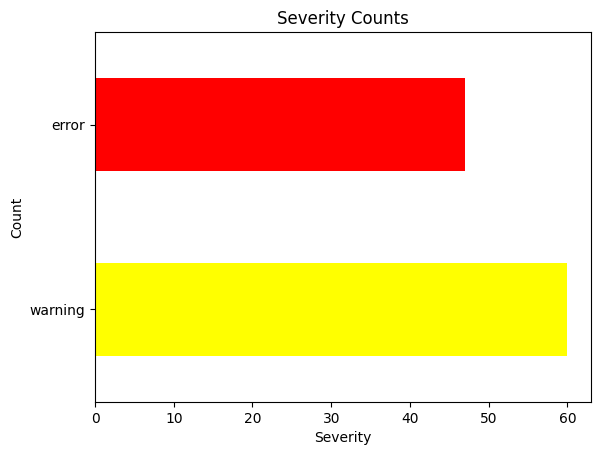

In [ ]:
import matplotlib.pyplot as plt

colors = {'error': 'red', 'warning': 'yellow'}  # Define colors for each severity level

severity_counts.plot(kind='barh', color=[colors[label] for label in severity_counts.index])
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Severity Counts')
plt.show()


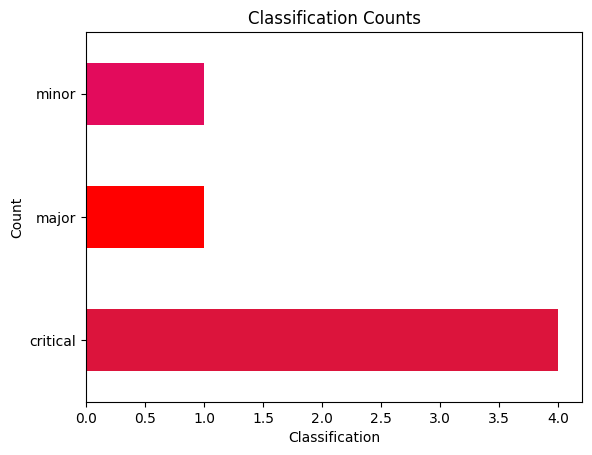

In [ ]:
classification_counts = severity_by_code_error['classification'].value_counts()
colors = {'critical': '#DC143C', 'major': 'red', 'minor': '#E30B5C'}  # Define colors for each severity level
classification_counts.plot(kind='barh', color=[colors[label] for label in classification_counts.index])
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Classification Counts')
plt.show()


In [ ]:
print(severity_by_code_error,"\n")
print(classification_counts)

severity                        error classification
code                                                
oas3-valid-schema-example         2.0          major
owasp:api1:2023-no-numeric-ids    2.0          minor
owasp:api4:2023-array-limit       5.0       critical
owasp:api4:2023-integer-limit    16.0       critical
owasp:api4:2023-rate-limit        5.0       critical
owasp:api4:2023-string-limit     17.0       critical 

classification
critical    4
major       1
minor       1
Name: count, dtype: int64


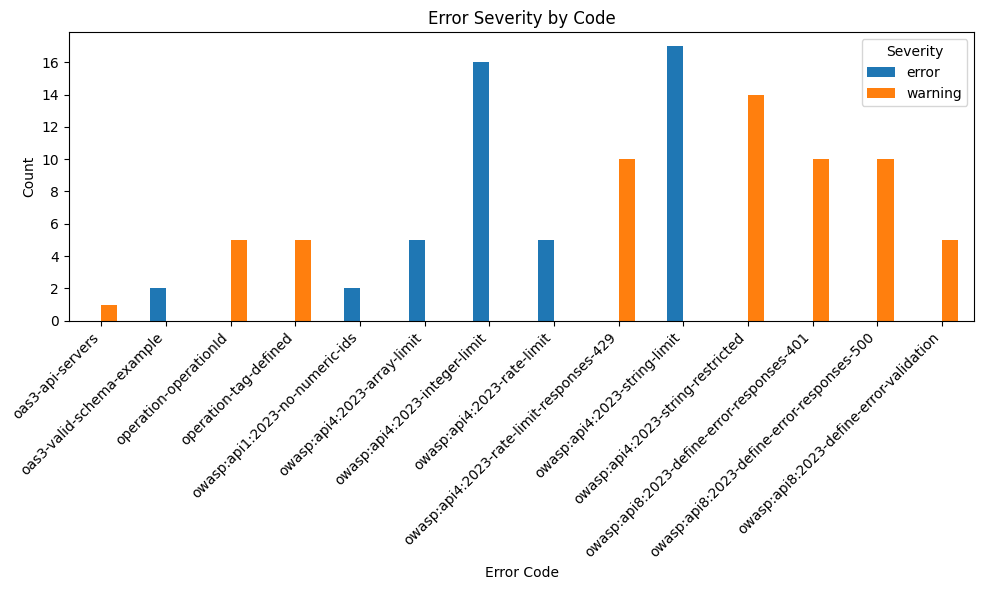

In [ ]:
severity_by_code.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Error Code')
plt.ylabel('Count')
plt.title('Error Severity by Code')
# plt.grid(True)  # Add a grid to the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Severity')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### Expanding severity code - by standards

In [ ]:
owasp_count = severity_by_code[severity_by_code.index.str.startswith('owasp')].shape[0]
oas_count = severity_by_code[severity_by_code.index.str.startswith('oas')].shape[0]
operation_count = severity_by_code[severity_by_code.index.str.startswith('operation')].shape[0]
other_count = severity_by_code[~severity_by_code.index.str.startswith(('owasp', 'oas', 'operation'))].shape[0]

print(f"Number of severity_by_code: 'owasp': {owasp_count}")
print(f"Number of severity_by_code: 'oas': {oas_count}")
print(f"Number of severity_by_code: 'operation': {operation_count}")
print(f"Number of severity_by_code with other strings: {other_count}")


Number of severity_by_code: 'owasp': 10
Number of severity_by_code: 'oas': 2
Number of severity_by_code: 'operation': 2
Number of severity_by_code with other strings: 0


## Major HTTP verb, Scheme

In [ ]:
df['path_3rd_element'] = df['path'].apply(lambda x: x[2] if isinstance(x, list) and len(x) >= 3 else None)
print(df[['path', 'path_3rd_element', 'code']])

                                                  path path_3rd_element  \
0                                                   []             None   
1                        [paths, /connect/token, post]             post   
2               [paths, /connect/token, post, tags, 0]             post   
3    [paths, /connect/token, post, requestBody, con...             post   
4    [paths, /connect/token, post, requestBody, con...             post   
..                                                 ...              ...   
102  [components, schemas, LedgerAccount, propertie...    LedgerAccount   
103                 [components, schemas, SOAPRequest]      SOAPRequest   
104                 [components, schemas, SOAPRequest]      SOAPRequest   
105                [components, schemas, SOAPResponse]     SOAPResponse   
106                [components, schemas, SOAPResponse]     SOAPResponse   

                                  code  
0                     oas3-api-servers  
1                

In [ ]:
df['path_3rd_element'].value_counts()

,count
path_3rd_element,
post,36
get,34
LedgerAccount,13
HealthCheckResponse,8
HealthCheckComponent,7
BalanceEnquiryModel,4
SOAPRequest,2
SOAPResponse,2


In [ ]:
df['path_5rd_element'] = df['path'].apply(lambda x: x[4] if isinstance(x, list) and len(x) >= 5 else None)
print(df['path_5rd_element'].value_counts())

path_5rd_element
200                        8
0                          7
content                    6
Status                     4
Description                3
AccountNumber              2
ledgerAccountName          2
Component                  2
Checks                     2
AppName                    2
Duration                   2
TransactionId              2
1                          2
7                          2
version                    1
currency                   1
postedCredit               1
postedDebit                1
pendingCredit              1
pendingDebit               1
ledgerAccountCategoryId    1
ledgerId                   1
normalBalance              1
ledgerAccountId            1
2                          1
3                          1
4                          1
5                          1
6                          1
currencyExponent           1
Name: count, dtype: int64


## **OWASP/OAS CODE: warning, error (Exploring)**

In [ ]:
severity_by_code_error

severity,error
code,
oas3-valid-schema-example,2.0
owasp:api1:2023-no-numeric-ids,2.0
owasp:api4:2023-array-limit,5.0
owasp:api4:2023-integer-limit,16.0
owasp:api4:2023-rate-limit,5.0
owasp:api4:2023-string-limit,17.0


### ***Schema of type `string` must specify maxLength, enum, or const.*** : owasp:api4:2023-string-limit


In [ ]:
df_filtered = df[(df['code'] == 'owasp:api4:2023-string-limit')]
for index, row in df_filtered.iterrows():
  print(f"\n {'/'.join(row['path'])}\n -- {row['message']}")


 paths//connect/token/post/requestBody/content/application/x-www-form-urlencoded/schema/properties/grant_type
 -- Schema of type string must specify maxLength, enum, or const.

 paths//connect/token/post/requestBody/content/application/x-www-form-urlencoded/schema/properties/client_id
 -- Schema of type string must specify maxLength, enum, or const.

 paths//connect/token/post/requestBody/content/application/x-www-form-urlencoded/schema/properties/client_secret
 -- Schema of type string must specify maxLength, enum, or const.

 paths//api/v1/ledgeraccounts/get/parameters/3/schema
 -- Schema of type string must specify maxLength, enum, or const.

 paths//api/v1/ledgeraccounts/get/parameters/4/schema
 -- Schema of type string must specify maxLength, enum, or const.

 paths//api/v1/ledgeraccounts/get/parameters/6/schema
 -- Schema of type string must specify maxLength, enum, or const.

 components/schemas/BalanceEnquiryModel/properties/TransactionId
 -- Schema of type string must specify

### ***Schema of type `integer` must specify minimum and maximum.*** : owasp:api4:2023-integer-limit

In [ ]:
df_filtered_int = df[(df['code'] == 'owasp:api4:2023-integer-limit')]
for index, row in df_filtered_int.iterrows():
  print(f"\n {'/'.join(row['path'])}\n -- {row['message']}")


 paths//api/v1/ledgeraccounts/get/parameters/0/schema/items
 -- Schema of type integer must specify minimum and maximum.

 paths//api/v1/ledgeraccounts/get/parameters/1/schema
 -- Schema of type integer must specify minimum and maximum.

 paths//api/v1/ledgeraccounts/get/parameters/2/schema
 -- Schema of type integer must specify minimum and maximum.

 paths//api/v1/ledgeraccounts/get/parameters/5/schema
 -- Schema of type integer must specify minimum and maximum.

 paths//api/v1/ledgeraccounts/get/parameters/7/schema
 -- Schema of type integer must specify minimum and maximum.

 components/schemas/LedgerAccount/properties/ledgerAccountId
 -- Schema of type integer must specify minimum and maximum.

 components/schemas/LedgerAccount/properties/ledgerId
 -- Schema of type integer must specify minimum and maximum.

 components/schemas/LedgerAccount/properties/normalBalance
 -- Schema of type integer must specify minimum and maximum.

 components/schemas/LedgerAccount/properties/version


In [ ]:
severity_by_code_warning

severity,warning
code,
oas3-api-servers,1.0
operation-operationId,5.0
operation-tag-defined,5.0
owasp:api4:2023-rate-limit-responses-429,10.0
owasp:api4:2023-string-restricted,14.0
owasp:api8:2023-define-error-responses-401,10.0
owasp:api8:2023-define-error-responses-500,10.0
owasp:api8:2023-define-error-validation,5.0


In [ ]:
df_filtered_str_warning = df[(df['code'] == 'owasp:api4:2023-string-restricted')]
for index, row in df_filtered_str_warning.iterrows():
  print(f"\n {'/'.join(row['path'])}\n -- {row['message']}")


 paths//connect/token/post/requestBody/content/application/x-www-form-urlencoded/schema/properties/grant_type
 -- Schema of type string should specify a format, pattern, enum, or const.

 paths//connect/token/post/requestBody/content/application/x-www-form-urlencoded/schema/properties/client_id
 -- Schema of type string should specify a format, pattern, enum, or const.

 paths//connect/token/post/requestBody/content/application/x-www-form-urlencoded/schema/properties/client_secret
 -- Schema of type string should specify a format, pattern, enum, or const.

 components/schemas/BalanceEnquiryModel/properties/TransactionId
 -- Schema of type string should specify a format, pattern, enum, or const.

 components/schemas/BalanceEnquiryModel/properties/AccountNumber
 -- Schema of type string should specify a format, pattern, enum, or const.

 components/schemas/HealthCheckResponse/properties/AppName
 -- Schema of type string should specify a format, pattern, enum, or const.

 components/sche

In [ ]:
df_filtered_missing_401 = df[(df['code'] == 'owasp:api8:2023-define-error-responses-401')]
for index, row in df_filtered_missing_401.iterrows():
  print(f"\n {'/'.join(row['path'])}\n -- {row['message']}")


 paths//connect/token/post/responses
 -- Operation is missing responses[401].

 paths//connect/token/post/responses
 -- Operation is missing responses[401].content.

 paths//health/get/responses
 -- Operation is missing responses[401].

 paths//health/get/responses
 -- Operation is missing responses[401].content.

 paths//subtract/post/responses
 -- Operation is missing responses[401].

 paths//subtract/post/responses
 -- Operation is missing responses[401].content.

 paths//api/v2/balanceenquiry/post/responses
 -- Operation is missing responses[401].

 paths//api/v2/balanceenquiry/post/responses
 -- Operation is missing responses[401].content.

 paths//api/v1/ledgeraccounts/get/responses
 -- Operation is missing responses[401].

 paths//api/v1/ledgeraccounts/get/responses
 -- Operation is missing responses[401].content.
